In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import fetch_california_housing

In [2]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
y.head()

,MedHouseVal
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


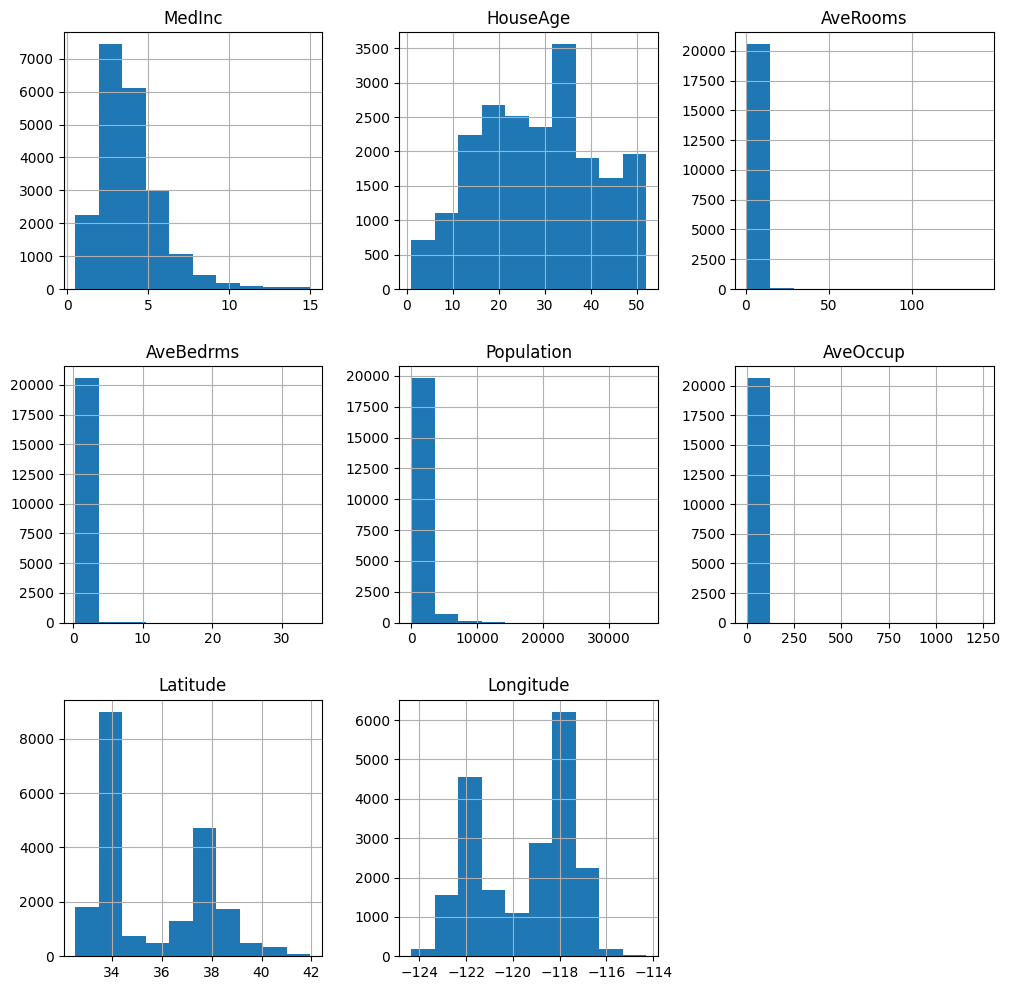

In [4]:
# to see the distribution of the variable
X.hist(bins=10,figsize=(12,12))
plt.show()

## Logarithmic Transformation

In [12]:
# plot histogram and QQ plot
def diagnostic_plot(df,variable):
  plt.figure(figsize=(12,6))

  plt.subplot(1,2,1)
  df[variable].hist(bins=30)

  plt.subplot(1,2,2)
  stats.probplot(df[variable],dist="norm",plot=plt)

  plt.show()

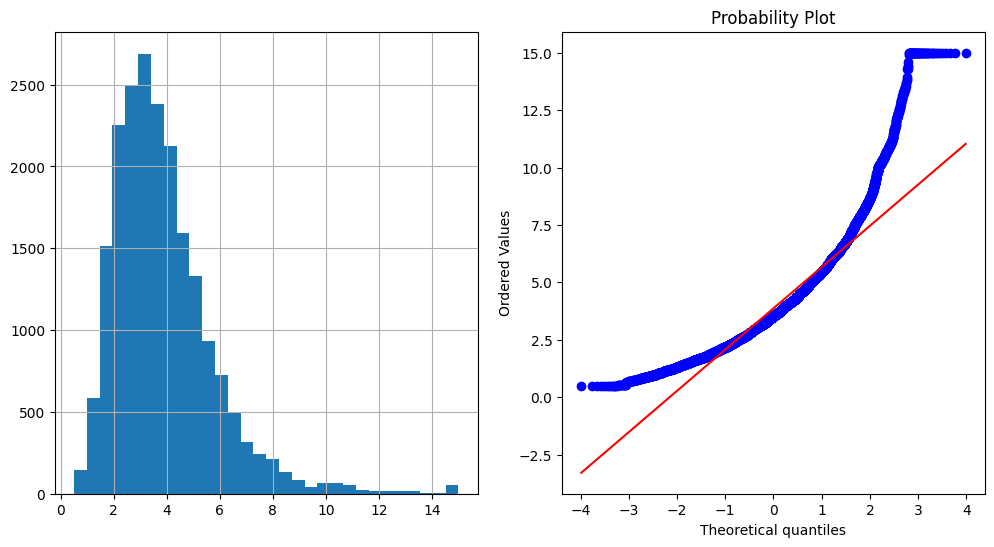

In [6]:
diagnostic_plot(X, "MedInc")

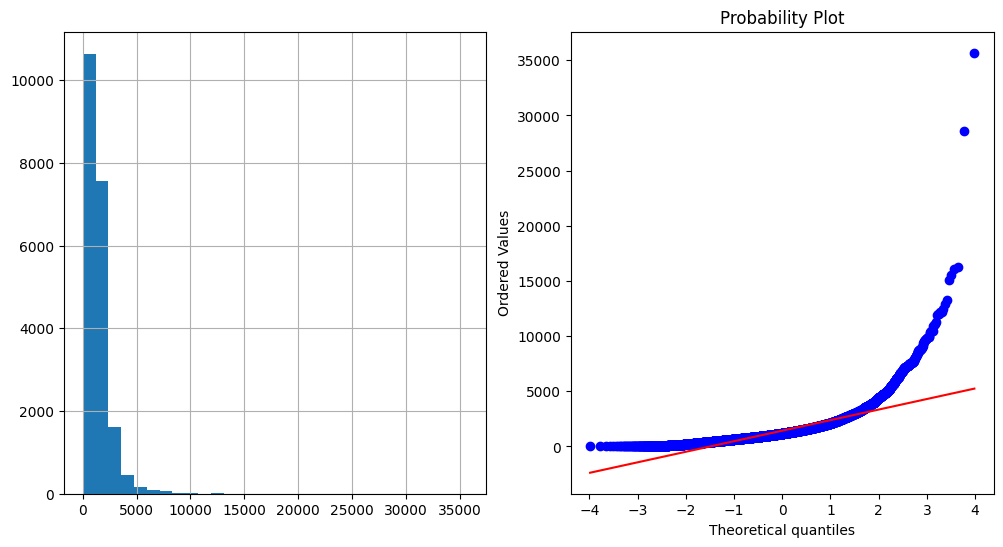

In [7]:
diagnostic_plot(X, "Population")

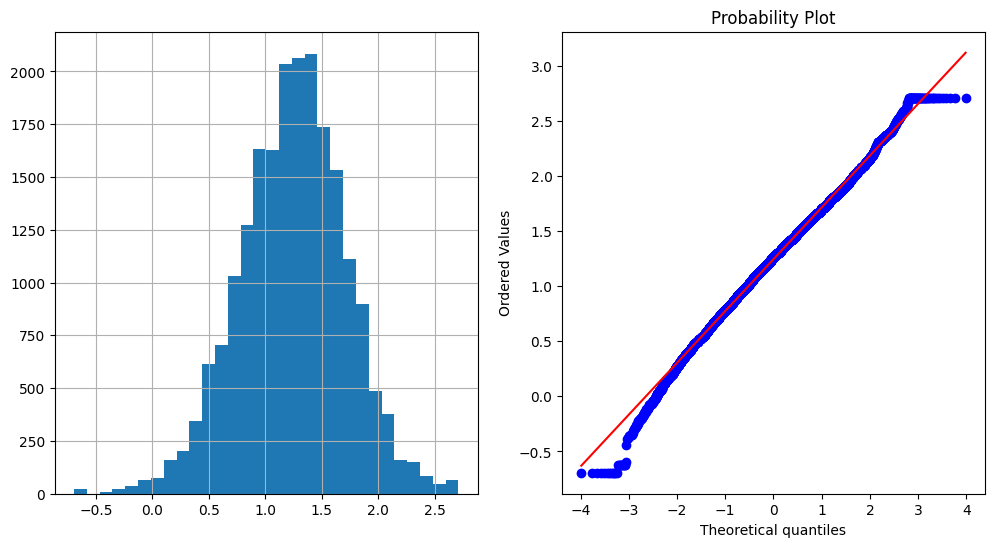

In [8]:
X_tf = X.copy()
variables = ["MedInc","Population"]
X_tf[variables] = np.log(X_tf[variables])
diagnostic_plot(X_tf, "MedInc")

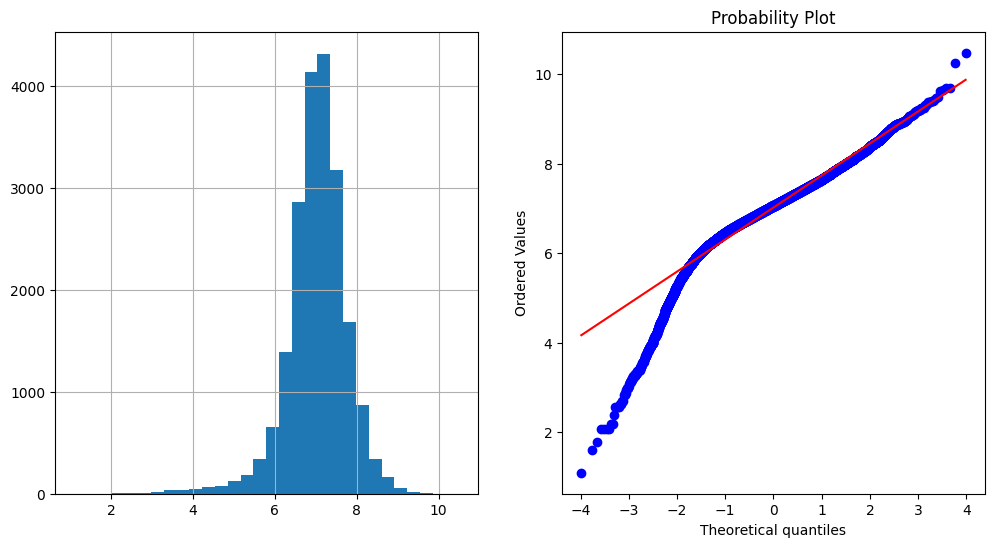

In [9]:
diagnostic_plot(X_tf, "Population")

In [10]:
# logarithm + constant
X_tf[variables] = np.log(X[variables] + 1)

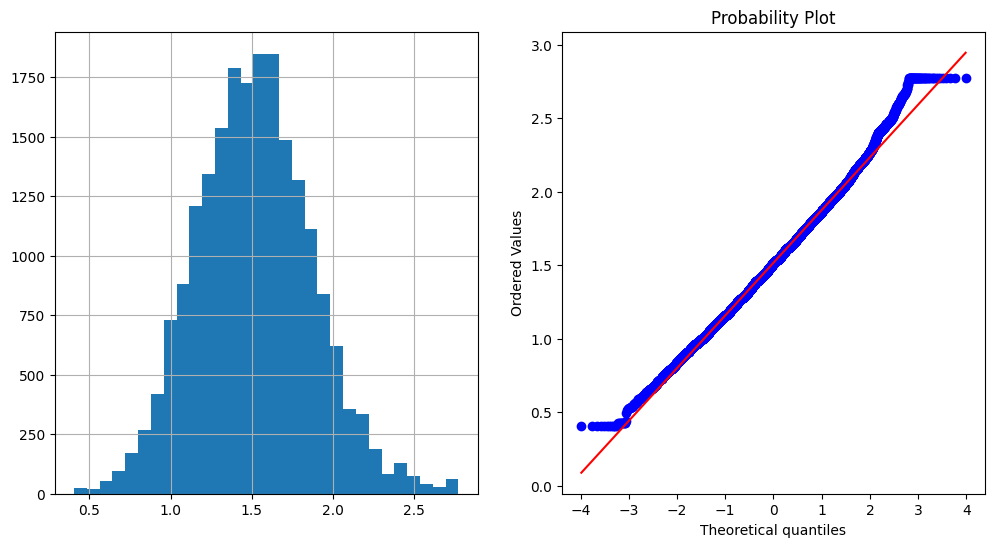

In [14]:
diagnostic_plot(X_tf, "MedInc")

## Reciprocal Transformation

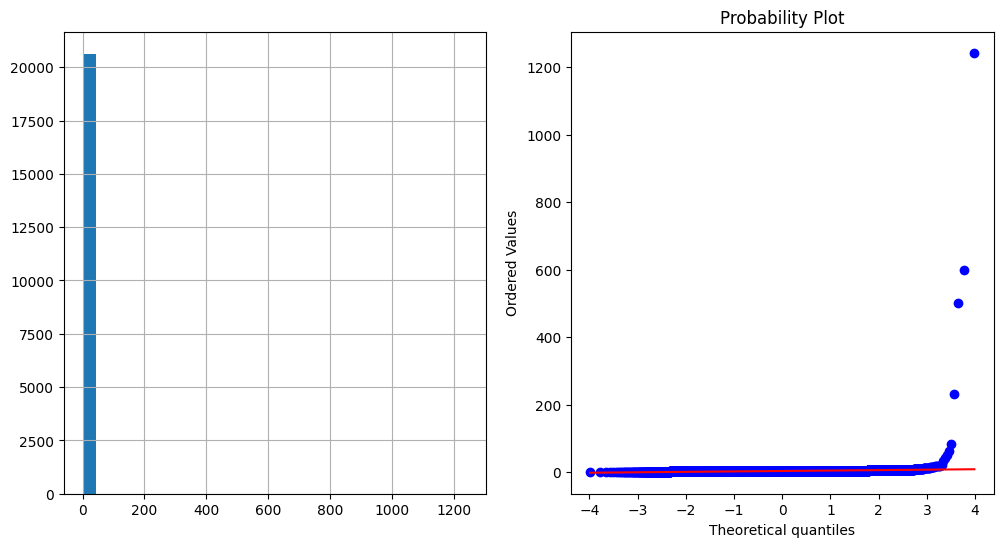

In [16]:
# aveoccup = avg ocuupatied avg. no of household
diagnostic_plot(X, "AveOccup")

In [17]:
X_tf = X.copy()
X_tf["AveOccup"] = np.reciprocal(X_tf["AveOccup"])

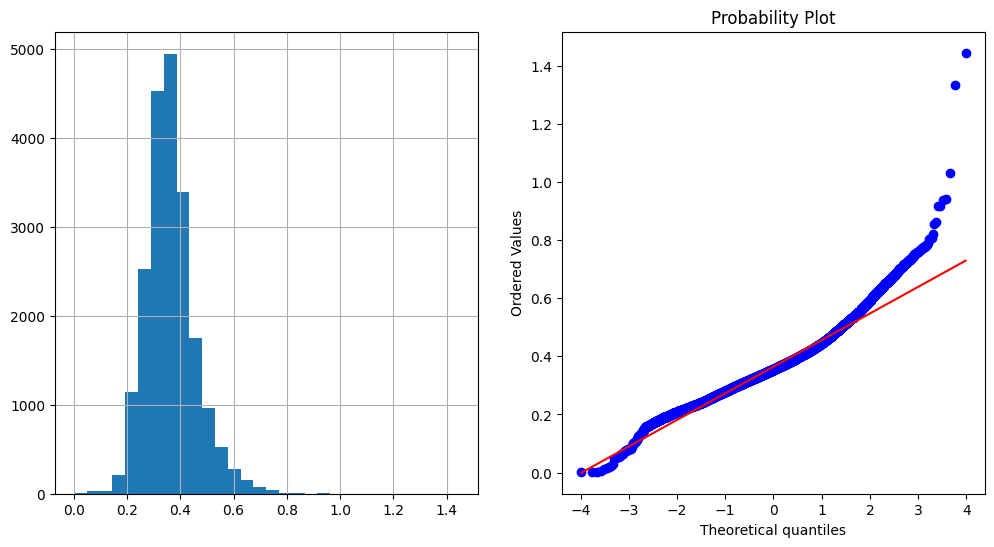

In [18]:
diagnostic_plot(X_tf, "AveOccup")

## Square Root Transformation

In [19]:
df = pd.DataFrame()

In [20]:
df["count1"] = stats.poisson.rvs(mu=3,size=1000)
df["count2"] = stats.poisson.rvs(mu=2,size=1000)
df.head()

,count1,count2
0,2,1
1,1,1
2,5,1
3,6,1
4,2,2


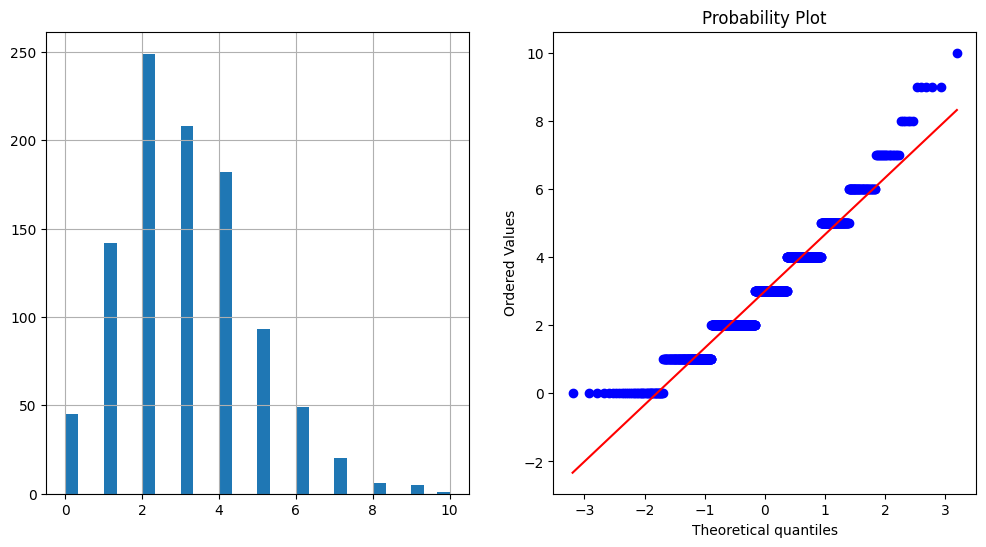

In [21]:
diagnostic_plot(df, "count1")

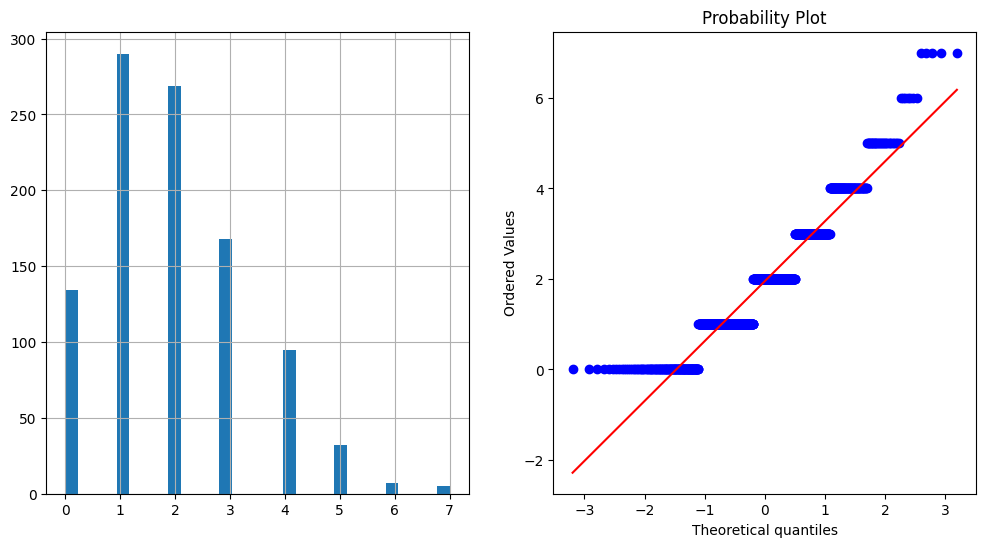

In [22]:
diagnostic_plot(df,"count2")

In [23]:
df_tf = df.copy()

In [24]:
df_tf[["count1","count2"]] = np.sqrt(df[["count1","count2"]])
df_tf.head()

,count1,count2
0,1.414214,1.000000
1,1.000000,1.000000
2,2.236068,1.000000
3,2.449490,1.000000
4,1.414214,1.414214


In [26]:
df_tf[["count1", "count2"]] = np.round(df_tf[["count1", "count2"]], 2)
df_tf.head()

,count1,count2
0,1.41,1.00
1,1.00,1.00
2,2.24,1.00
3,2.45,1.00
4,1.41,1.41


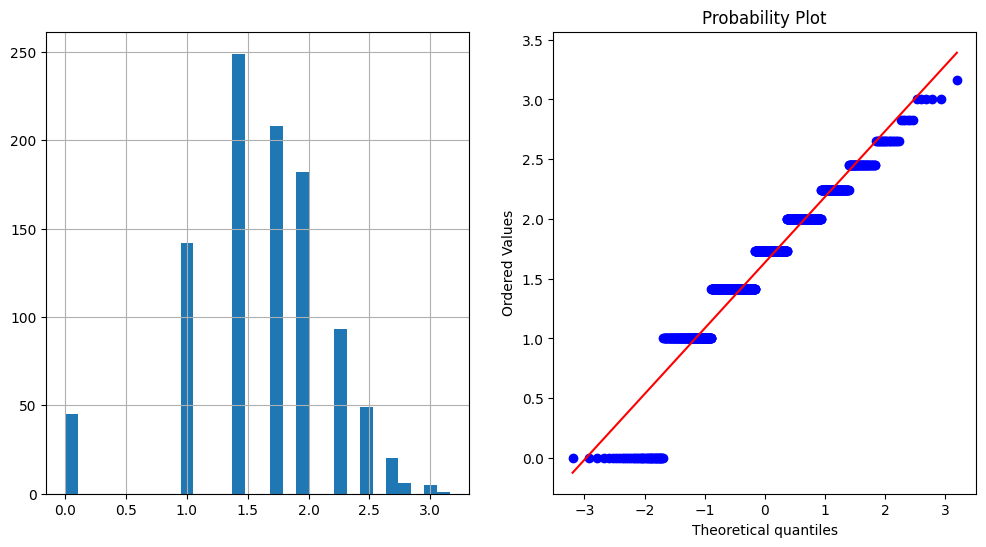

In [27]:
diagnostic_plot(df_tf, "count1")

## Power Transformation

In [28]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


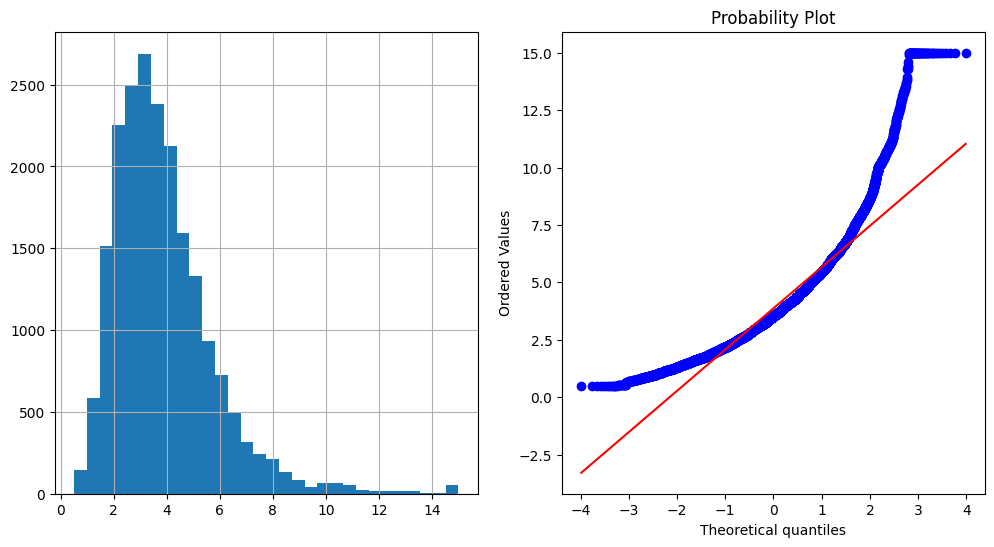

In [29]:
diagnostic_plot(X,"MedInc")

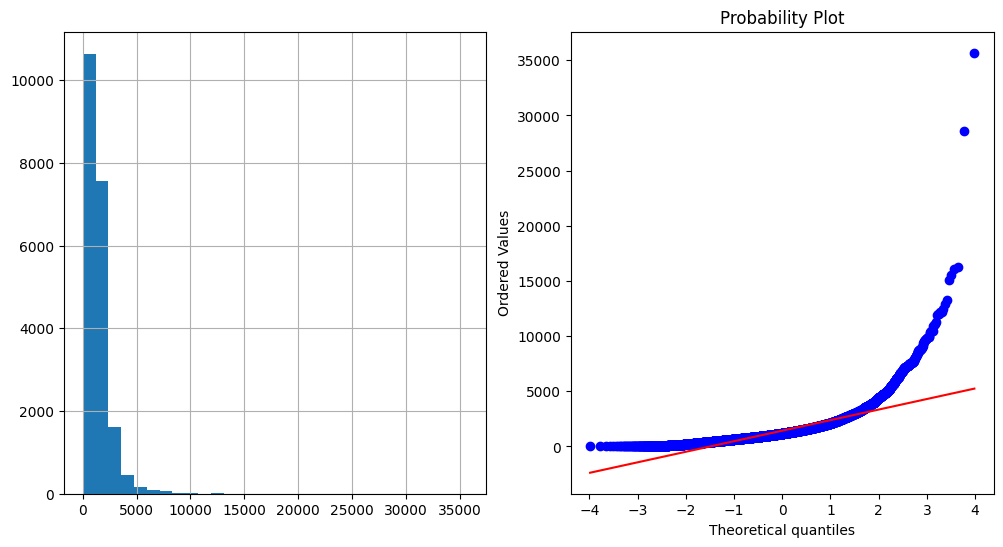

In [30]:
diagnostic_plot(X,"Population")

In [31]:
X_tf = X.copy()

In [32]:
variables = ["MedInc","Population"]

In [33]:
X_tf[variables] = np.power(X_tf[variables],0.3)

In [34]:
X_tf.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,1.888506,41.0,6.984127,1.023810,5.654012,2.555556,37.88,-122.23
1,1.886885,21.0,6.238137,0.971880,10.330412,2.109842,37.86,-122.22
2,1.812318,52.0,8.288136,1.073446,6.436422,2.802260,37.85,-122.24
3,1.680565,52.0,5.817352,1.073059,6.667918,2.547945,37.85,-122.25
4,1.497992,52.0,6.281853,1.081081,6.692903,2.181467,37.85,-122.25


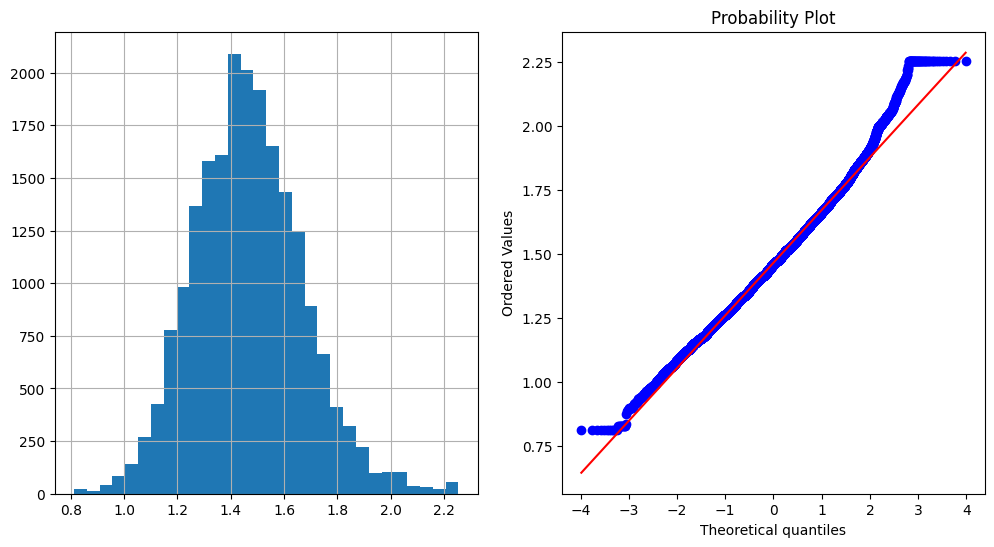

In [35]:
diagnostic_plot(X_tf,"MedInc")

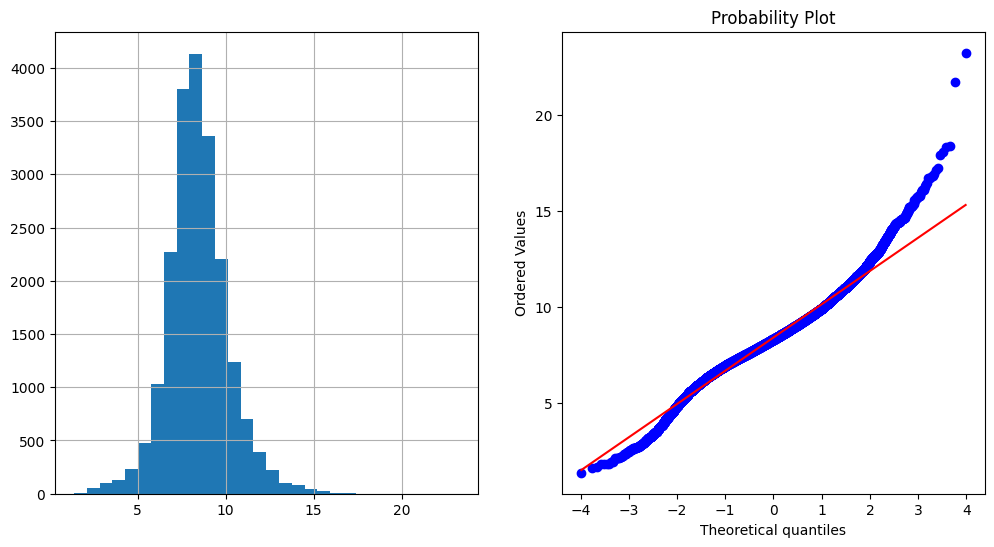

In [36]:
diagnostic_plot(X_tf,"Population")

## Box Cox Transformation

In [40]:
import scipy.stats as stats

In [37]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


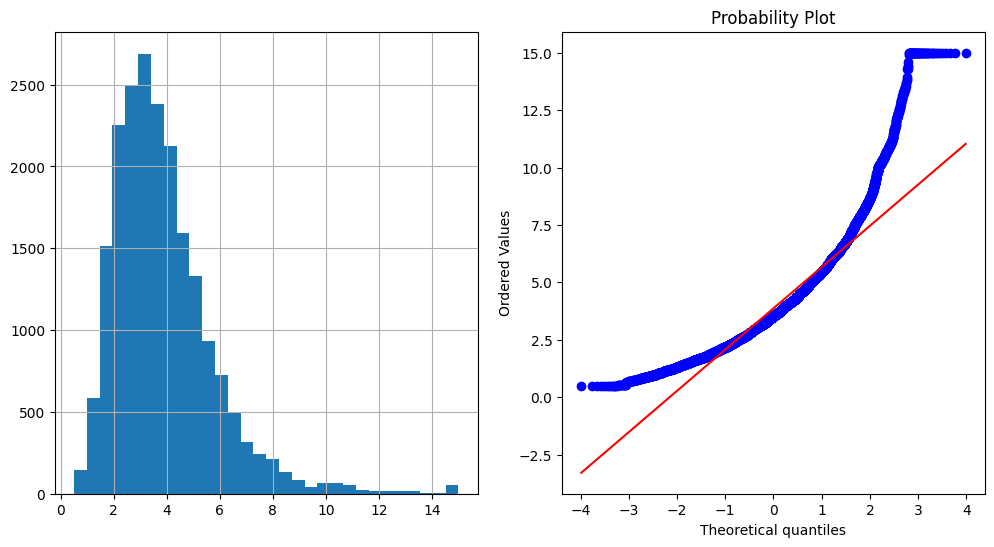

In [38]:
diagnostic_plot(X,"MedInc")

In [39]:
X_tf = X.copy()

In [42]:
X_tf["MedInc"],param = stats.boxcox(X_tf["MedInc"])
print("Optimal λ: ", param)

Optimal λ:  0.090854472181


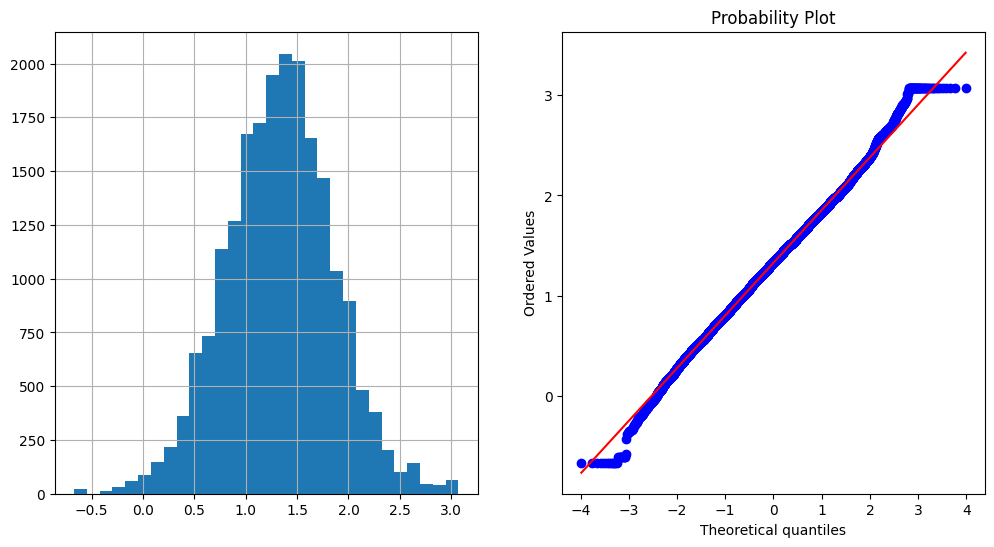

In [43]:
diagnostic_plot(X_tf,"MedInc")

## Yeo Johnson

In [44]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


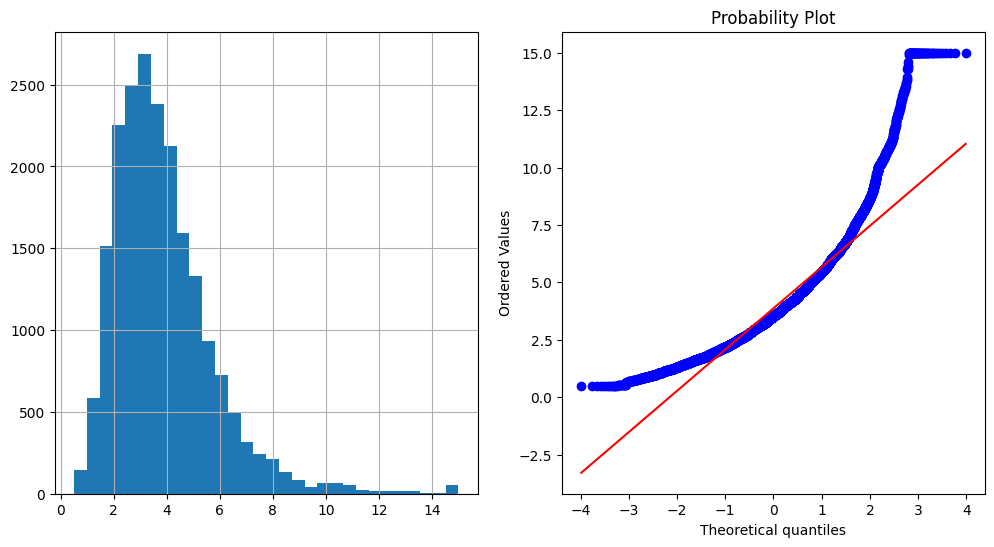

In [45]:
diagnostic_plot(X,"MedInc")

In [46]:
X_tf = X.copy()

In [47]:
X_tf["MedInc"],param = stats.yeojohnson(X_tf["MedInc"])
print("Optimal λ: ", param)

Optimal λ:  -0.1985098875801701


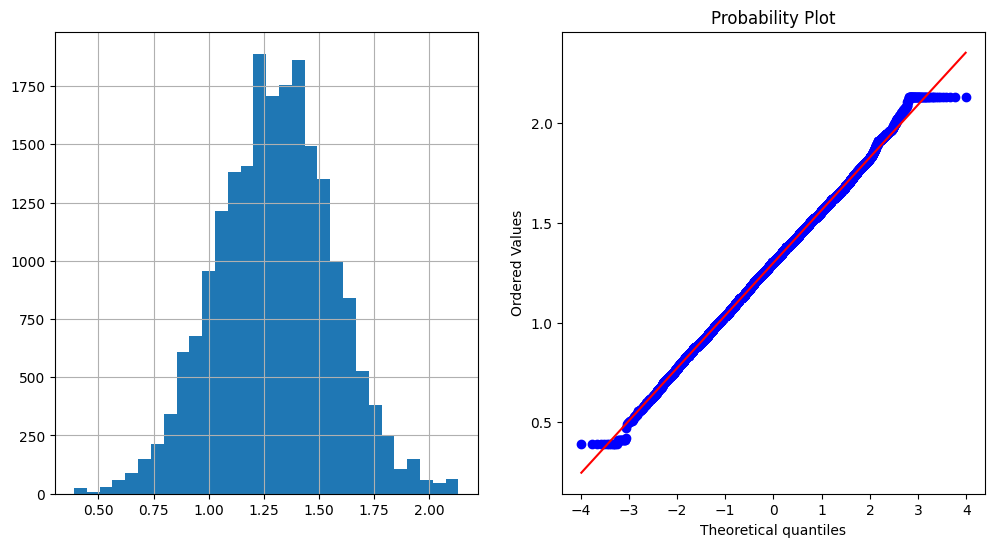

In [48]:
diagnostic_plot(X_tf,"MedInc")